## 1. Importing Libraries 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

##  Wordcloud for text analysis 
#!pip install wordcloud
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords  

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
import seaborn as sns

In [5]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string


In [6]:
from collections import Counter

In [7]:
# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to /home/nayan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nayan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2.Load Data

In [8]:
df = pd.read_csv('./datasets/spam_ham_dataset.csv')

In [9]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## 3.Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [11]:
df.drop(columns = ['Unnamed: 0','label_num'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [13]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,label,text
0,ham,"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."
1,ham,"Subject: hpl nom for january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls"
2,ham,"Subject: neon retreat ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time ! i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute . on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about . i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer . the first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past . the second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide . email me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! ) have a great weekend , great golf , great fishing , great shopping , or whatever makes you happy ! bobby"
3,spam,"Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin"
4,ham,"Subject: re : indian springs this deal is to book the teco pvr revenue . it is my understanding that teco just sends us a check , i haven ' t received an answer as to whether there is a predermined price associated with this deal or if teco just lets us know what we are giving . i can continue to chase this deal down if you need ."


###  2.2 Convert the target variable

In [14]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['label'])

In [15]:
df.head()

,label,text,target
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


###  2.3 Check for Missing Values 

In [17]:
df.isnull().sum()

label     0
text      0
target    0
dtype: int64

### 2.3 Duplicates


In [18]:
df.duplicated().sum()

178

In [19]:
df.shape

(5171, 3)

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.shape

(4993, 3)

## 3.EDA

### 3.1 Percentage of ham and spam 

In [22]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 70.71900660925296
percentage of 1 : 29.280993390747046


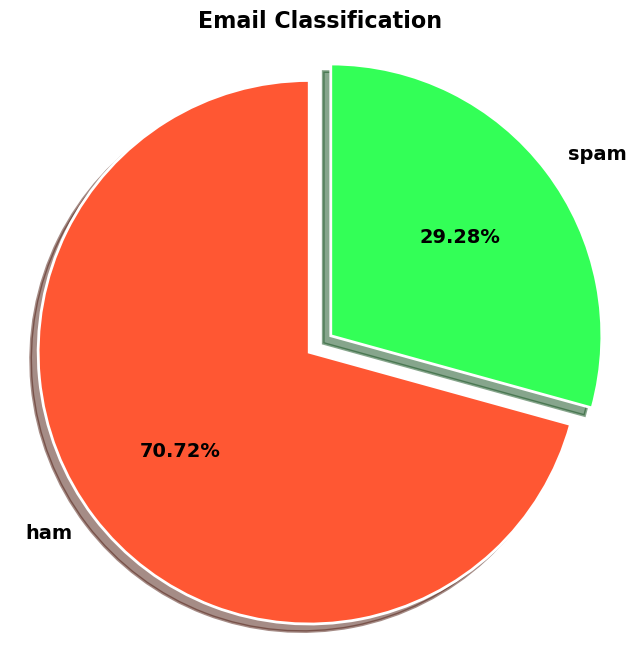

In [23]:
# Sample data
# values = [70, 30]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

### 3.2 Text Length and Structure analysis 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4993 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4993 non-null   object
 1   text    4993 non-null   object
 2   target  4993 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 156.0+ KB


In [25]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,label,text,target,num_characters,num_words,num_sentence
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [27]:
df.describe()

,target,num_characters,num_words,num_sentence
count,4993.000000,4993.000000,4993.000000,4993.000000
mean,0.292810,1069.426397,233.678149,13.386942
std,0.455098,1547.863387,340.702932,27.959959
min,0.000000,11.000000,2.000000,1.000000
25%,0.000000,256.000000,55.000000,4.000000
50%,0.000000,557.000000,125.000000,7.000000
75%,1.000000,1262.000000,288.000000,15.000000
max,1.000000,32258.000000,8863.000000,1204.000000


### 3.3 Summary Statistics for Legitimate and Spam Messages

In [28]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [29]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


### 3.4 Character Length Distribution for Legitimate and Spam Messages


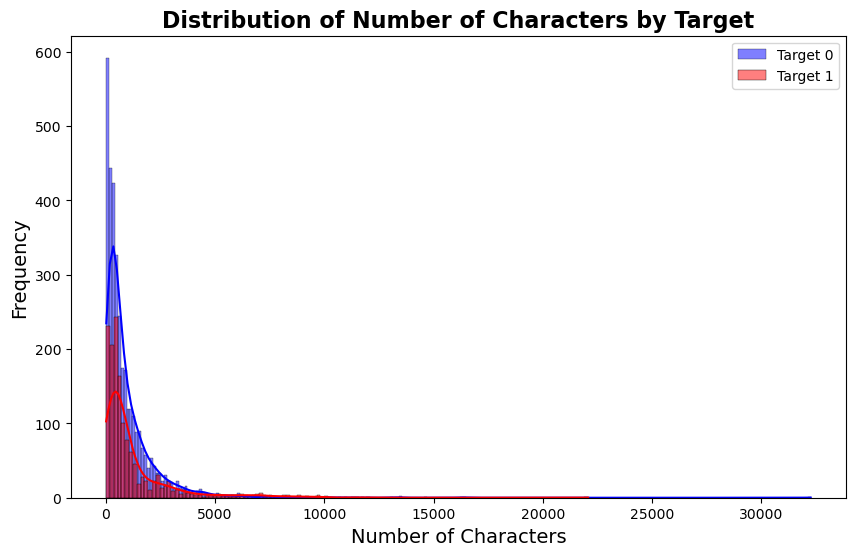

In [30]:

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

### 3.5 Word Count Distribution for Legitimate and Spam Messages

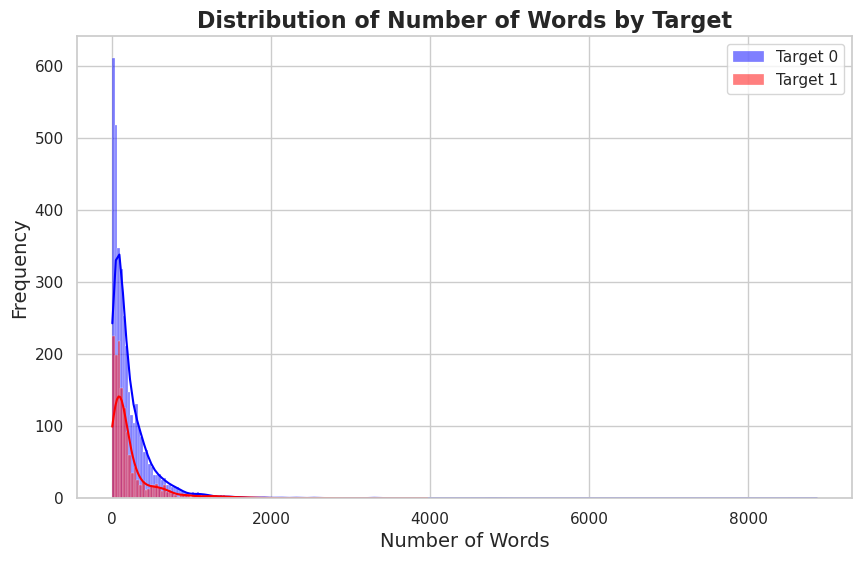

In [31]:
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

### 3.6 Pairplot for Data Visualization

/home/nayan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


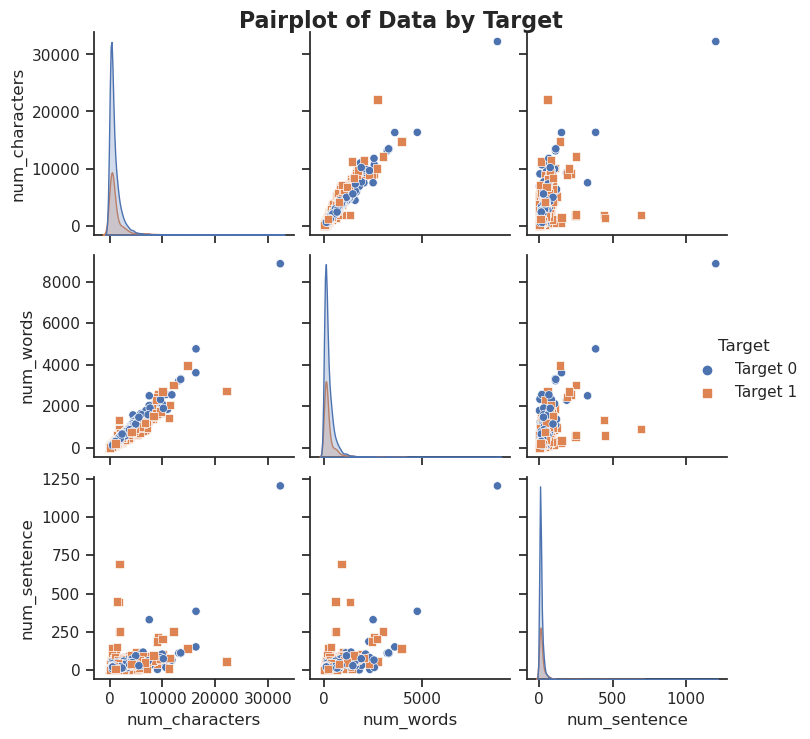

In [32]:
# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

### 3.7 Correlation

In [33]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.074794,0.014425,0.095863
num_characters,0.074794,1.000000,0.970492,0.630026
num_words,0.014425,0.970492,1.000000,0.703256
num_sentence,0.095863,0.630026,0.703256,1.000000


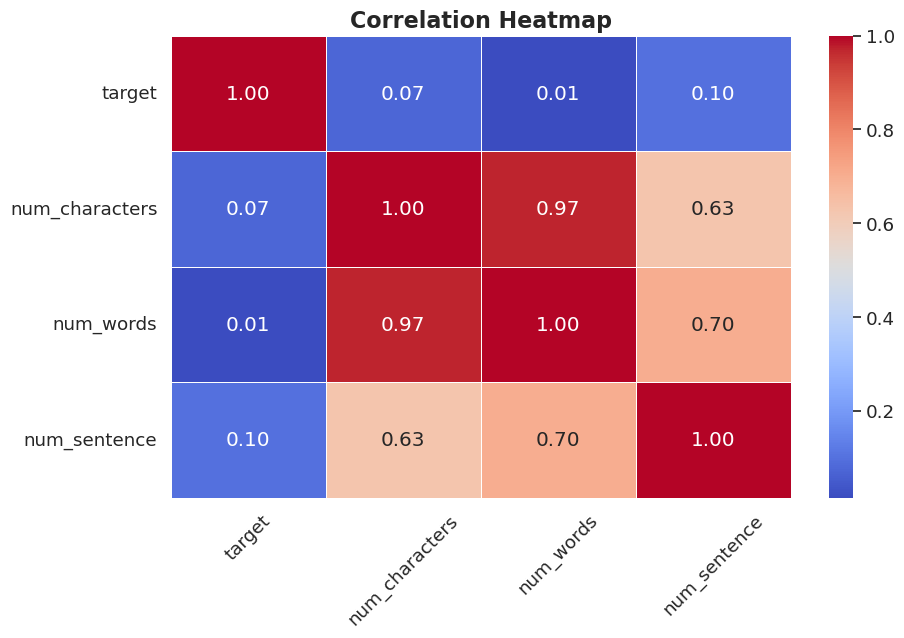

In [34]:
# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

## 4 Data Preprocessing 

### 4.1 Stemming  

In [35]:
# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [36]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great \n world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,label,text,target,num_characters,num_words,num_sentence,transformed_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


### 4.2 Word Cloud for Spam and not Spam Messages

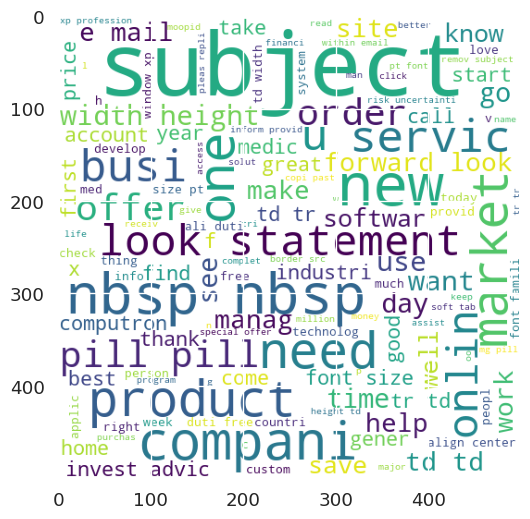

In [39]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

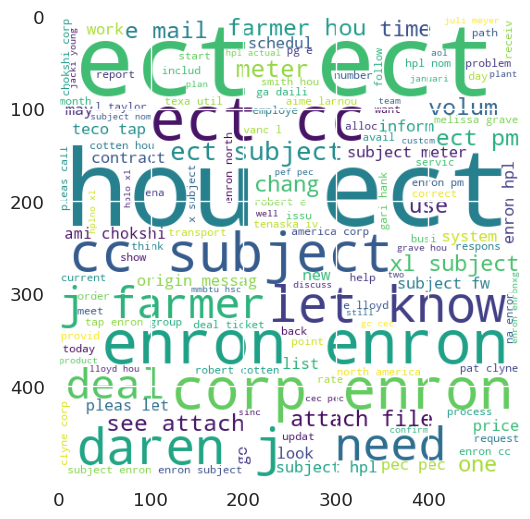

In [40]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

### 6.3 Top 30 words of spam and non Spam mails

In [41]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [42]:
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

In [43]:
print(filter_df)

            0     1
0     subject  1622
1           3  1229
2         com   989
3        http   981
4     compani   918
5           2   853
6       price   731
7           1   710
8           0   688
9           e   632
10        www   586
11     inform   553
12         00   550
13        get   547
14       font   515
15      email   509
16          5   506
17         td   504
18      pleas   503
19      secur   499
20  statement   497
21          4   493
22     invest   473
23      stock   467
24         us   466
25    product   459
26          7   451
27       time   448
28        new   427
29        may   421


In [44]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [45]:
nfilter_df = pd.DataFrame(Counter(ham_carpos).most_common(30))

In [46]:
print(nfilter_df)

          0      1
0       ect  13690
1       hou   7174
2     enron   6442
3   subject   6210
4      2000   4209
5      deal   3481
6        ga   2784
7       com   2713
8     meter   2709
9     pleas   2675
10       cc   2324
11      hpl   2291
12       pm   2283
13    thank   2068
14     2001   1988
15        1   1971
16      000   1854
17    daren   1837
18       00   1795
19       10   1754
20       01   1701
21     need   1690
22        3   1663
23     corp   1662
24    volum   1645
25  forward   1571
26        2   1504
27     know   1405
28    mmbtu   1396
29        e   1333


In [47]:
common_elements=set()
common_elements = set(nfilter_df) & set(filter_df)

In [48]:
print(common_elements)

{0, 1}


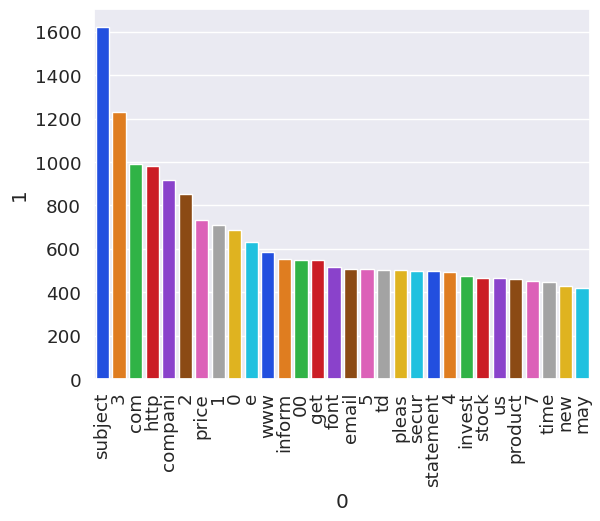

In [49]:
## Bar plot of frequency of each word in  filter_df
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

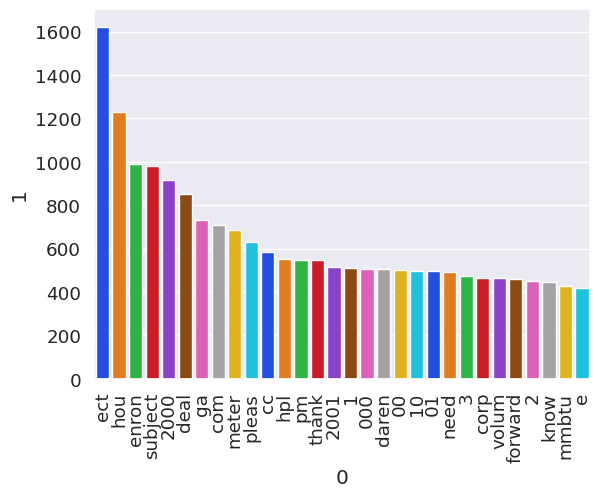

In [50]:
## Bar plot of frequency of each word in  filter_df
sns.barplot(data = filter_df, x = nfilter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

## 5.Model Building 

### 5.1  Initializing CountVectorizer and TfidfVectorizer

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
# ```CountVectorizer converts text data into a matrix of token counts, where each row represents a document and each column represents a unique word in the vocabulary```
tfid = TfidfVectorizer(max_features = 3000)
# TfidfVectorizer is similar to CountVectorizer but istead of frequency has percentage of that word in the given doc

### 5.2 Dependent and independent Variable 

In [54]:
# X = nor of records * vocabulary
# y = target value for each record

X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

### 5.3 Split the data into train and test 

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [63]:
X_train.shape

(3994, 3000)

### 5.4 Importing the models 

In [65]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/c3/eb/496aa2f5d356af4185f770bc76055307f8d1870e11016b10fd779b21769c/xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.8 MB/s eta 0:00:0000:0100:03


In [67]:
# Initializing models

svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [69]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}
    

In [70]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [71]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.980980980980981
Precision:  0.9639344262295082

For:  KNN
Accuracy:  0.953953953953954
Precision:  0.9295302013422819

For:  NB
Accuracy:  0.9319319319319319
Precision:  0.8524096385542169

For:  DT
Accuracy:  0.8448448448448449
Precision:  0.6681922196796338

For:  LR
Accuracy:  0.955955955955956
Precision:  0.9056603773584906

For:  RF
Accuracy:  0.965965965965966
Precision:  0.935064935064935

For:  Adaboost
Accuracy:  0.948948948948949
Precision:  0.8934169278996865

For:  Bgc
Accuracy:  0.9419419419419419
Precision:  0.8836477987421384

For:  ETC
Accuracy:  0.978978978978979
Precision:  0.9576547231270358

For:  GBDT
Accuracy:  0.9359359359359359
Precision:  0.9219858156028369

For:  xgb
Accuracy:  0.958958958958959
Precision:  0.9116719242902208
